# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Three observable trends based on the data:
1. As latitude decreases max temperature increases. This can be analyzed on the Latitude vs. Temperature scatter plot as the plot points are at the highest temperature when latitude is closest to zero.
2. There is very little correlation between latitude and wind speed. This can be analyzed on the linear regression plots for Northern and Southern Hemisphere as the r-squared value is not near 1.
3. Humidity has a very small negative correlation to latitude. This can be analyzed on the linear regression plots for Northern and Southern Hemisphere as the r-squared value is not near 1.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

!pip install citipy
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

666

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
mycity = "Austin"
units = "Imperial"

# Build query URL
query_url = base_url + "appid=" + weather_api_key + "&q=" + mycity + "&units="+ units

mycity_json = requests.get(query_url).json()

print(json.dumps(mycity_json, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 30.27,
        "lon": -97.74
    },
    "dt": 1592584237,
    "id": 4671654,
    "main": {
        "feels_like": 88.92,
        "humidity": 58,
        "pressure": 1016,
        "temp": 85.62,
        "temp_max": 88,
        "temp_min": 82.99
    },
    "name": "Austin",
    "sys": {
        "country": "US",
        "id": 3344,
        "sunrise": 1592566169,
        "sunset": 1592616923,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 16093,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "gust": 18.34,
        "speed": 6.93
    }
}


In [25]:
# Set empty lists to hold city data
City = []
Country = []
Date = []
Cloudiness = []
Humidity = []
Latitude = []
Longitude = []
Max_Temp = []
Wind_Speed = []

print("Beginning Data Retrieval")
print("---------------------------")

# Loop through each city
for index, city in enumerate(cities):

    # Create search query, make request and store in json
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units="+ units
    city_json = requests.get(query_url).json()
    
    # Try to grab the city data if they are available in the Weather API
    try:
        City.append(city_json["name"])
        Country.append(city_json["sys"]["country"])
        Date.append(city_json["dt"])
        Cloudiness.append(city_json["clouds"]["all"])
        Humidity.append(city_json["main"]["humidity"])
        Latitude.append(city_json["coord"]["lat"])
        Longitude.append(city_json["coord"]["lon"])
        Max_Temp.append(city_json["main"]["temp_max"])
        Wind_Speed.append(city_json["wind"]["speed"])
        print("Index : {}, City: {} Found ! Collected Weather Data".format(index, city))

    # Handle exceptions for a city that is not available in the Weather API
    except:
        print("Index : {}, City: {} Not found ! Skipping".format(index,city))
        pass
    
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

Beginning Data Retrieval
---------------------------
Index : 0, City: noblesville Found ! Collected Weather Data
Index : 1, City: cabo san lucas Found ! Collected Weather Data
Index : 2, City: georgetown Found ! Collected Weather Data
Index : 3, City: punta arenas Found ! Collected Weather Data
Index : 4, City: taolanaro Not found ! Skipping
Index : 5, City: ponta do sol Found ! Collected Weather Data
Index : 6, City: den helder Found ! Collected Weather Data
Index : 7, City: touros Found ! Collected Weather Data
Index : 8, City: krasnoselkup Found ! Collected Weather Data
Index : 9, City: belushya guba Not found ! Skipping
Index : 10, City: grand river south east Not found ! Skipping
Index : 11, City: saskylakh Found ! Collected Weather Data
Index : 12, City: akyab Found ! Collected Weather Data
Index : 13, City: mayo Found ! Collected Weather Data
Index : 14, City: cape town Found ! Collected Weather Data
Index : 15, City: ushuaia Found ! Collected Weather Data
Index : 16, City: vill

Index : 142, City: okhotsk Found ! Collected Weather Data
Index : 143, City: banjar Found ! Collected Weather Data
Index : 144, City: port augusta Found ! Collected Weather Data
Index : 145, City: timbo Found ! Collected Weather Data
Index : 146, City: victoria Found ! Collected Weather Data
Index : 147, City: candido mendes Found ! Collected Weather Data
Index : 148, City: ondorhaan Not found ! Skipping
Index : 149, City: saint-georges Found ! Collected Weather Data
Index : 150, City: new norfolk Found ! Collected Weather Data
Index : 151, City: faanui Found ! Collected Weather Data
Index : 152, City: zyryanka Found ! Collected Weather Data
Index : 153, City: pangnirtung Found ! Collected Weather Data
Index : 154, City: mrirt Not found ! Skipping
Index : 155, City: bethel Found ! Collected Weather Data
Index : 156, City: murmashi Found ! Collected Weather Data
Index : 157, City: pilot butte Found ! Collected Weather Data
Index : 158, City: mount gambier Found ! Collected Weather Data


Index : 283, City: daxian Not found ! Skipping
Index : 284, City: porto novo Found ! Collected Weather Data
Index : 285, City: nizhneyansk Not found ! Skipping
Index : 286, City: tura Found ! Collected Weather Data
Index : 287, City: christchurch Found ! Collected Weather Data
Index : 288, City: campbell river Found ! Collected Weather Data
Index : 289, City: petropavlovsk-kamchatskiy Found ! Collected Weather Data
Index : 290, City: beringovskiy Found ! Collected Weather Data
Index : 291, City: alekseyevsk Found ! Collected Weather Data
Index : 292, City: kahului Found ! Collected Weather Data
Index : 293, City: helong Found ! Collected Weather Data
Index : 294, City: axim Found ! Collected Weather Data
Index : 295, City: clyde river Found ! Collected Weather Data
Index : 296, City: bondoukou Found ! Collected Weather Data
Index : 297, City: avera Found ! Collected Weather Data
Index : 298, City: castro Found ! Collected Weather Data
Index : 299, City: harwich Found ! Collected Weathe

Index : 424, City: shemordan Found ! Collected Weather Data
Index : 425, City: yining Found ! Collected Weather Data
Index : 426, City: tara Found ! Collected Weather Data
Index : 427, City: piripiri Found ! Collected Weather Data
Index : 428, City: dolores Found ! Collected Weather Data
Index : 429, City: carutapera Found ! Collected Weather Data
Index : 430, City: harnosand Found ! Collected Weather Data
Index : 431, City: kargat Found ! Collected Weather Data
Index : 432, City: muriwai beach Found ! Collected Weather Data
Index : 433, City: richards bay Found ! Collected Weather Data
Index : 434, City: khasan Found ! Collected Weather Data
Index : 435, City: mao Found ! Collected Weather Data
Index : 436, City: ferkessedougou Found ! Collected Weather Data
Index : 437, City: artyk Not found ! Skipping
Index : 438, City: abu dhabi Found ! Collected Weather Data
Index : 439, City: alotau Not found ! Skipping
Index : 440, City: abalak Found ! Collected Weather Data
Index : 441, City: r

Index : 565, City: klaksvik Found ! Collected Weather Data
Index : 566, City: kirakira Found ! Collected Weather Data
Index : 567, City: panzhihua Found ! Collected Weather Data
Index : 568, City: concordia Found ! Collected Weather Data
Index : 569, City: rudnichnyy Found ! Collected Weather Data
Index : 570, City: amderma Not found ! Skipping
Index : 571, City: paytug Not found ! Skipping
Index : 572, City: ust-kamchatsk Not found ! Skipping
Index : 573, City: stephenville Found ! Collected Weather Data
Index : 574, City: basse Found ! Collected Weather Data
Index : 575, City: bonthe Found ! Collected Weather Data
Index : 576, City: attawapiskat Not found ! Skipping
Index : 577, City: muros Found ! Collected Weather Data
Index : 578, City: dunedin Found ! Collected Weather Data
Index : 579, City: presidencia roque saenz pena Found ! Collected Weather Data
Index : 580, City: bethanien Found ! Collected Weather Data
Index : 581, City: jiuquan Found ! Collected Weather Data
Index : 582,

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
# Create new dataframe
weather_df = pd.DataFrame({"City": City,
                           "Country": Country,
                           "Date": Date,
                           "Cloudiness": Cloudiness,
                           "Humidity": Humidity,
                           "Latitude": Latitude,
                           "Longitude": Longitude,
                           "Max Temp": Max_Temp,
                           "Wind Speed": Wind_Speed
})

weather_df

,City,Country,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Noblesville,US,1592584415,0,45,40.05,-86.01,88.00,1.01
1,Cabo San Lucas,MX,1592583924,5,45,22.89,-109.91,93.20,3.36
2,George Town,MY,1592583915,20,94,5.41,100.34,80.60,2.08
3,Punta Arenas,CL,1592584510,90,100,-53.15,-70.92,33.80,12.75
4,Ponta do Sol,PT,1592583915,40,73,32.67,-17.10,71.60,13.87
...,...,...,...,...,...,...,...,...,...
601,Gijang,KR,1592584649,75,68,35.24,129.21,71.60,6.93
602,Parnamirim,BR,1592584692,90,100,-5.92,-35.26,75.20,14.99
603,Vitim,RU,1592584255,26,90,59.45,112.56,54.61,4.74
604,Sechura,PE,1592584693,2,56,-5.56,-80.82,75.87,10.71


In [27]:
# Save datafram to csv
output_data_file = "output_data/cities.csv"

weather_df.to_csv(output_data_file, index=False, encoding="utf-8")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

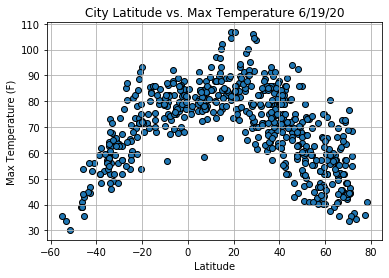

In [43]:
# Plot out Latitude versus Temperature scatter plot

plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker="o", edgecolors="black")

plt.title("City Latitude vs. Max Temperature 6/19/20")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_MaxTemp")

plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

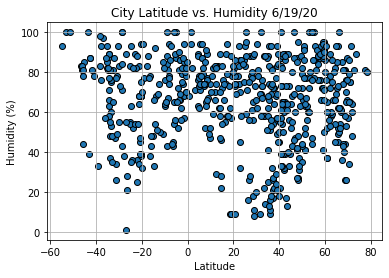

In [44]:
# Plot out Latitude versus Humidity scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o", edgecolors="black")

plt.title("City Latitude vs. Humidity 6/19/20")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Humidity")

plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

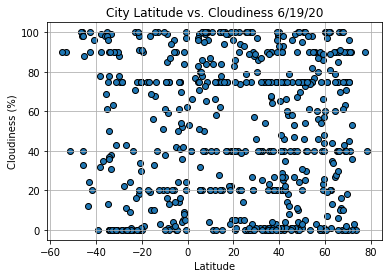

In [45]:
# Plot out Latitude versus Cloudiness scatter plot

plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o", edgecolors="black")

plt.title("City Latitude vs. Cloudiness 6/19/20")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Cloudiness")

plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

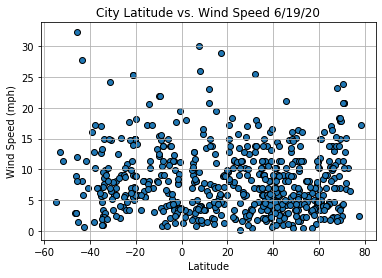

In [46]:
# Plot out Latitude versus Wind Speed scatter plot

plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o", edgecolors="black")

plt.title("City Latitude vs. Wind Speed 6/19/20")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_WindSpeed")

plt.show

## Linear Regression

In [32]:
# OPTIONAL: Create a function to create Linear Regression plots


In [33]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_df.loc[weather_df["Latitude"]>0]
north_df.head()


,City,Country,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Noblesville,US,1592584415,0,45,40.05,-86.01,88.0,1.01
1,Cabo San Lucas,MX,1592583924,5,45,22.89,-109.91,93.2,3.36
2,George Town,MY,1592583915,20,94,5.41,100.34,80.6,2.08
4,Ponta do Sol,PT,1592583915,40,73,32.67,-17.10,71.6,13.87
5,Den Helder,NL,1592584511,75,72,52.96,4.76,73.0,11.41


In [34]:
south_df = weather_df.loc[weather_df["Latitude"]<0]
south_df.head()

,City,Country,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
3,Punta Arenas,CL,1592584510,90,100,-53.15,-70.92,33.80,12.75
6,Touros,BR,1592584511,90,100,-5.20,-35.46,75.20,11.41
11,Cape Town,ZA,1592584387,0,48,-33.93,18.42,73.00,14.99
12,Ushuaia,AR,1592584388,90,93,-54.80,-68.30,35.60,4.70
13,Villa Carlos Paz,AR,1592584512,43,34,-31.42,-64.50,64.99,24.16


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7237678731201553


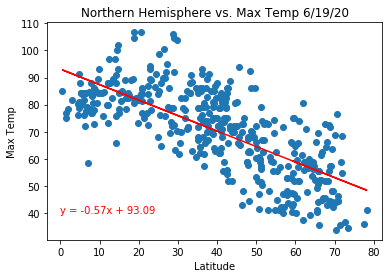

In [64]:
# Add the linear regression equation and line to Northern Hemisphere, Max Temp versus Latitude plot.

x_values = north_df['Latitude']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=10,color="red")
plt.title("Northern Hemisphere vs. Max Temp 6/19/20")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8149530085407374


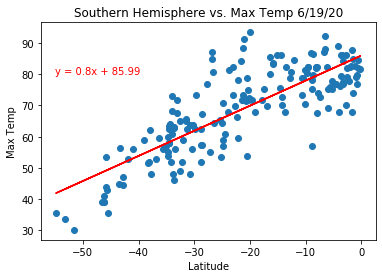

In [63]:
# Add the linear regression equation and line to Southern Hemisphere, Max Temp versus Latitude plot.

x_values = south_df['Latitude']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=10,color="red")
plt.title("Southern Hemisphere vs. Max Temp 6/19/20")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.04126525053232928


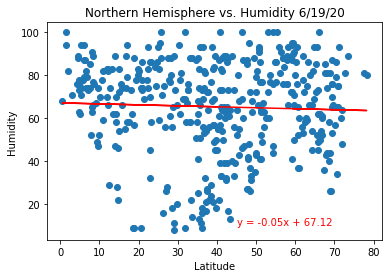

In [62]:
# Add the linear regression equation and line to Northern Hemisphere, Humidity versus Latitude plot.

x_values = north_df['Latitude']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=10,color="red")
plt.title("Northern Hemisphere vs. Humidity 6/19/20")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.03441861411417439


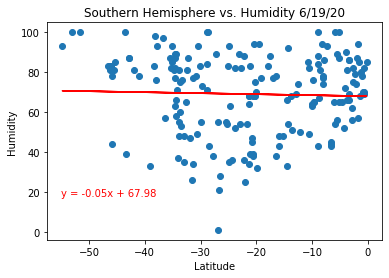

In [61]:
# Add the linear regression equation and line to Southern Hemisphere, Humidity versus Latitude plot.

x_values = south_df['Latitude']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,18),fontsize=10,color="red")
plt.title("Southern Hemisphere vs. Humidity 6/19/20")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08314678456331


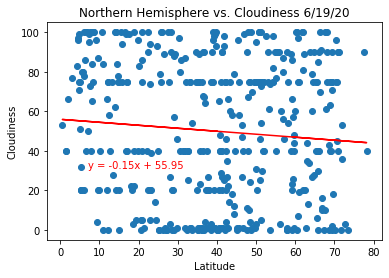

In [60]:
# Add the linear regression equation and line to Northern Hemisphere, Cloudiness versus Latitude plot.

x_values = north_df['Latitude']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,31),fontsize=10,color="red")
plt.title("Northern Hemisphere vs. Cloudiness 6/19/20")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.1301324852838415


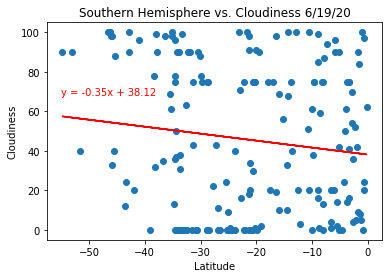

In [58]:
# Add the linear regression equation and line to Southern Hemisphere, Cloudiness versus Latitude plot.

x_values = south_df['Latitude']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,68),fontsize=10,color="red")
plt.title("Southern Hemisphere vs. Cloudiness 6/19/20")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.036114267980043746


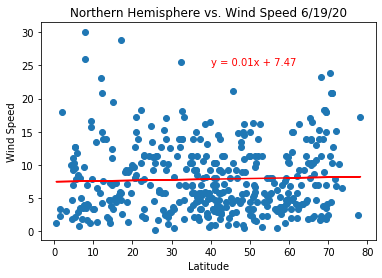

In [66]:
# Add the linear regression equation and line to Northern Hemisphere, Wind Speed versus Latitude plot.

x_values = north_df['Latitude']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=10,color="red")
plt.title("Northern Hemisphere vs. Wind Speed 6/19/20")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.016860176599129216


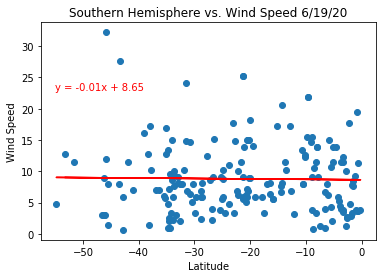

In [68]:
# Add the linear regression equation and line to Southern Hemisphere, Wind Speed versus Latitude plot.

x_values = south_df['Latitude']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,23),fontsize=10,color="red")
plt.title("Southern Hemisphere vs. Wind Speed 6/19/20")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue}")
plt.show()